In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv("comments.csv", encoding='UTF-8')
data.drop(['created_at', 'product_id'] , axis = 1, inplace = True )
data = data.dropna()
# data = data.drop(index=5910)
data['verification_status'] = data['verification_status'].map({'verified' : 1 , 'rejected' : 0 })
# data
# data.groupby('verification_status').describe()
data.head()

,comment,title,verification_status,likes
0,کسی میتونه راهنمایی کنه فرق این کنسول با همین ...,علت اختلاف قیمت,0.0,0
1,سلام.این ماشین های اصلاح جمی 830*840*845 و......,تنظیم تخصصی ماشینهای اصلاح جمی,0.0,0
2,با سلام،مدلی که من سفارش داده بودم با مدلی که ...,این ترازو رو توصیه نمیکنم,0.0,0
3,مخصوص چه قهوه ای است؟,مخصوص چه قهوه ای است؟,0.0,0
4,ايکاش براي خريد محصولات فرهنگي پيشنهاد شگفت ان...,پيشنهاد شگفت انگيز براي محصولات فرهنگي,0.0,0


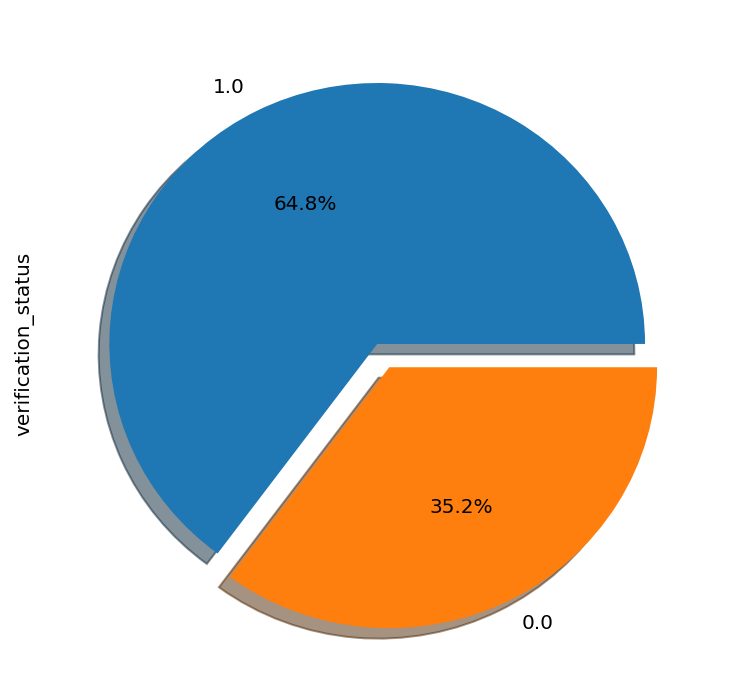

In [3]:
data['verification_status'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)

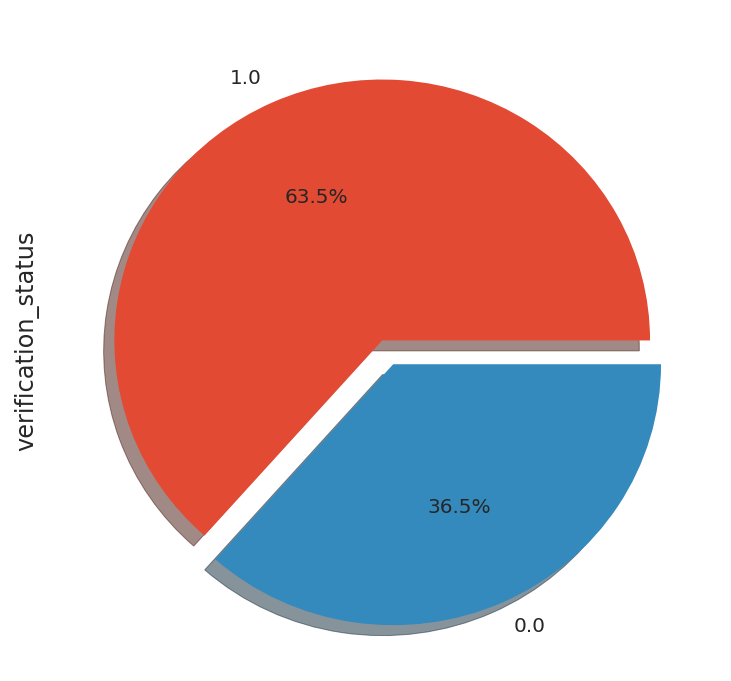

In [4]:
cm_counts = data.verification_status.count()
train_data = data.loc[ : cm_counts*.75]
# (train_data.verification_status).value_counts()
plt.style.use('ggplot')
sns.set_style('whitegrid')
train_data['verification_status'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)

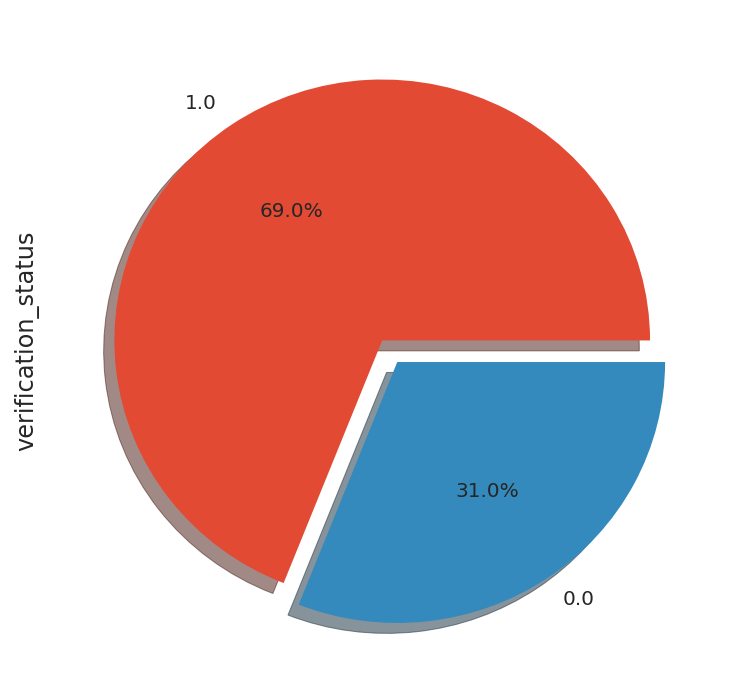

In [5]:

test_data = data.loc[ cm_counts*.75+1 : ]
test_data['verification_status'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)

In [6]:
import collections

def count_words(data):
    counter = collections.OrderedDict()
    for comment in data:
        for word in re.split(r'\W+',comment):
            if (word in counter):
                counter[word] += 1
            else:
                counter[word] = 1
    return counter

In [7]:
verified_comments = set(train_data[train_data.verification_status == True]['comment'])
verified_words = count_words(verified_comments)

rejected_comments = set(train_data[train_data.verification_status == False]['comment'])
rejected_words = count_words(rejected_comments)


In [8]:
def bar_chart_words(words, top=10, messages_type="", color="#1f77b4"):
    top_spam = np.array(sorted(words.items(), key=lambda x: -x[1]))[:top]
    top_words = top_spam[ : :-1, 0]
    top_words_count = [int(i) for i in top_spam[ : :-1, 1]]
    # aesthetics
    if messages_type:
        messages_type = messages_type + " " 
    plt.title(f"Top {top} most common words in {messages_type} comments")
    plt.xlabel(f"Number of words")
    plt.barh(top_words, top_words_count, color=color)
    plt.show()

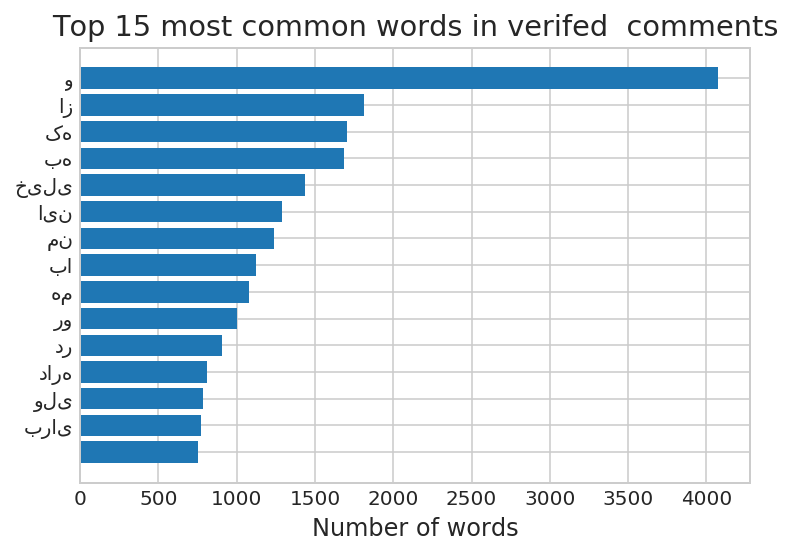

In [9]:
bar_chart_words(verified_words, top=15 , messages_type="verifed" )

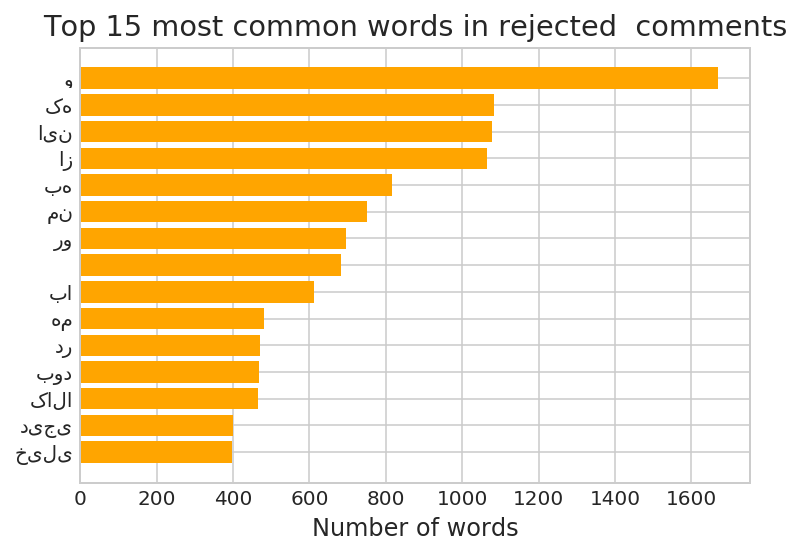

In [10]:
bar_chart_words(rejected_words, top=15 , messages_type="rejected" , color= "orange" )

In [11]:
pip install hazm


The following command must be run outside of the IPython shell:

    $ pip install hazm

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [12]:
# re.split(r'\W+',train_data.comment[100])
from __future__ import unicode_literals
from hazm import *

file = open('StopWords.txt')

stop_words1 = file.read()
stop_words1 = list(re.split(r'\W+',stop_words1))
stop_words1

stop_words2 = stopwords_list()
# # stemmer = Stemmer()
# stop_words2.append( 'یه')
# stop_words2.append( 'های')
# stop_words2.append( 'داره')
# stop_words2.append( 'نداره')
# stop_words2.append( 'هست')
# stop_words2.append( 'میشه')
# stop_words2.append( 'واقعا')
# stop_words2.append( 'اصلا')


stop_words = stop_words2
# stop_words

def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False


In [13]:
def process_comment(comment):
    words = re.split(r'\W+',comment)
    words = [word for word in words if len(word) > 2]
    words = [word for word in words if word not in stop_words]
#     words = [Stemmer().stem(word) for word in words]
    return words


# process_comment()

normalizer = Normalizer()

# data.title.apply(process_comment)

In [14]:
def count_processed_words(data):
    counter = collections.OrderedDict()
    for comment in data:
        words = process_comment(comment)
        for word in set(words):
            if (word in counter):
                counter[word] += 1
            else:
                counter[word] = 1
    return counter
verified_words = count_processed_words(verified_comments)
rejected_words = count_processed_words(rejected_comments)
# verified_words

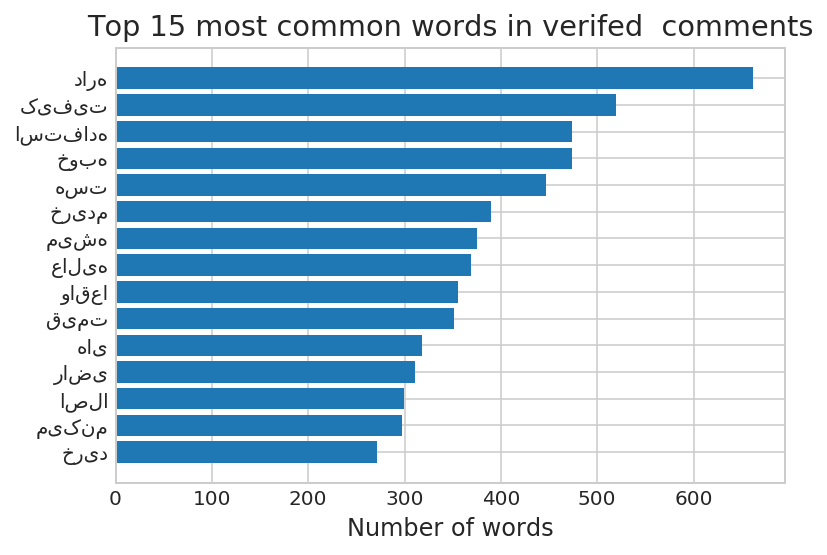

In [15]:
bar_chart_words(count_processed_words(verified_comments), top=15 , messages_type="verifed" )


# top_spam = np.array(sorted(verified_words.items(), key=lambda x: -x[1]))[:10]
# top_words = top_spam[ : :-1, 0]
# top_words

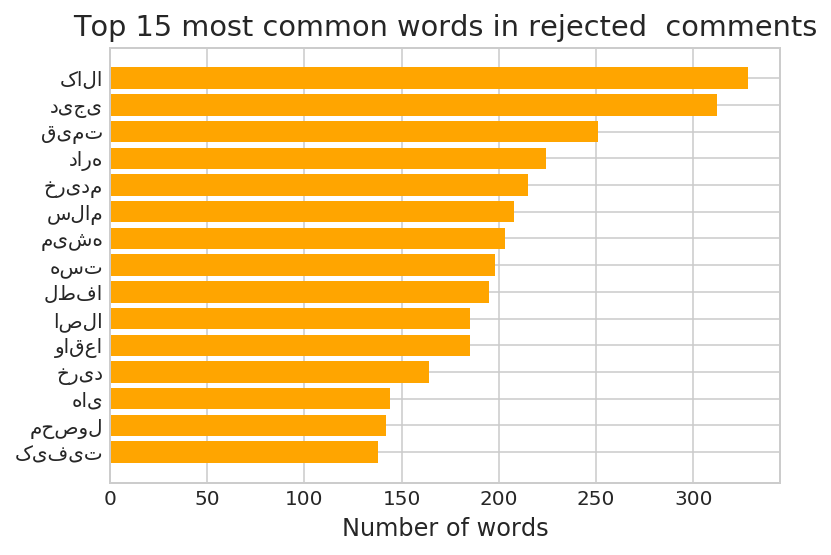

In [16]:
bar_chart_words(count_processed_words(rejected_comments), top=15 , messages_type="rejected" , color="orange")
# top_spam = np.array(sorted(rejected_words.items(), key=lambda x: -x[1]))[:10]
# top_words = top_spam[ : :-1, 0]


In [17]:
verified_comments = [i for i in verified_comments if len(verified_comments) >= 1]
rejected_comments = [i for i in rejected_comments if len(verified_comments) >= 1]
all_comments = verified_comments + rejected_comments
all_words = count_processed_words(all_comments)
# bar_chart_words(all_words, top=15 , messages_type="rejected" , color="green")
rejected_words = count_processed_words(rejected_comments)
verified_words = count_processed_words(verified_comments)

count_processed_words

<function __main__.count_processed_words(data)>

# # method 1 


In [18]:
def verify_percent(comment , s = 10 , p =0.5):
    
    verified_prob = 0
    rejected_prob = 0
    n = 0
    for word in  process_comment(comment):    
        if word in verified_words.keys():    
            verified_prob = verified_words[word] / all_words[word]
        
        if word in rejected_words.keys():
            rejected_prob = rejected_words[word] / all_words[word]
            
            
        if  not (rejected_prob + verified_prob) == 0  and word in all_words.keys() :
            
            verfiness_word = verified_prob / (verified_prob + rejected_prob)
            corr_verifiness = (s*p + verfiness_word * all_words[word]) / (s + all_words[word])
            
            n += np.log(1- corr_verifiness) - np.log(corr_verifiness)
    
    
    return (1 / (1 + np.e**n))
        
x=11092
print(verify_percent(data.comment[x]),data.verification_status[x] , data.comment[x])
    

0.9502086901778669 0.0 چاقو تیز هست یا نه می شه باهاش چیزی برید؟


In [19]:
# data.comment.apply(process_comment)
# data.title.dropna()
# data.title.apply(process_comment)
# data.head()

# method 2  TF - IDF


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidfv = TfidfVectorizer(analyzer=process_comment , encoding = "UTF-8", strip_accents = "unicode")
comment_data = tfidfv.fit_transform(data.comment)

In [22]:
mess = data.comment[111]
print(mess)

عاشقشم خیلی راضیم


In [23]:
print(tfidfv.transform([mess]))

  (0, 6852)	0.8699872836303687
  (0, 5328)	0.49307415904856783


In [24]:
j = tfidfv.transform([mess]).toarray()[0]
print('index \t idf \t tfidf \t term')
for i in range(len(j)):
    if j[i] != 0:
        print(i, format(tfidfv.idf_[i], '.4f'), format(j[i], '.4f'), tfidfv.get_feature_names()[i],sep='\t')

index 	 idf 	 tfidf 	 term
5328	4.5226	0.4931	راضیم
6852	7.9798	0.8700	عاشقشم


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
comment_filter = Pipeline([
    ('vectorizer',tfidfv), # messages to weighted TFIDF score
    ('classifier', MultinomialNB())])              # train on TFIDF vectors with Naive Bayes


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.comment, data.verification_status, test_size=0.20, random_state = 21)

In [27]:
comment_filter.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer=<function process_comment at 0x7f1b73d4a730>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='UTF-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), norm=...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [28]:
predictions = comment_filter.predict(x_test)

In [29]:
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1
print('Total number of test cases', len(y_test))
print('Number of wrong of predictions', count)

Total number of test cases 2365
Number of wrong of predictions 352


In [30]:
x_test[y_test != predictions]

4647     نمی ارزه، مقدار طلاش خیلی کمه، سنگینه، من ۴ تا...
6257         وقتی به دستم رسید دیدم از عکسش خیلی قشنگتره .
2104     قیمتش واقعا خیلی بالاس و بعد با این پول راحت د...
5145     اصلا خوب نیست عکسش کوچیکتره جنسش پلاستیک بازیا...
8562     خییییییلیییی کوچیکه بشقاب به زور داخلش جا میشه...
5452     محصول خوبیه من یه مدته که استفاده میکنم اما او...
6169     سلام دستگاه خوبیه من سال ۹۷خریدم ۱۵۰راضیم باها...
258      سلام دستگاه خوبیه من سال ۹۷خریدم ۱۵۰راضیم باها...
5754                                اینو پیشنهاد ویژه بدین
205      فوقلاده گشیه خوبیه.. با گوشی هایه ۶.۷ تومنیه س...
262                               کاش سایز ۴۰×۴۰رو هم داشت
4239     سلام\r\nنمونه ارسالی فقط و فقط شبیه عکس می باش...
3614                   آیا این هواکش چپ گرد راست گرد هست ؟
10229                                          چرا؟؟؟؟؟ :|
6173                              کاش سایز ۴۰×۴۰رو هم داشت
6259     از این دستبند هم برای خودم خریدم هم دوستم . خی...
11513    پنکه خوبیه\r\nهم قشنگه هم باد خوبی داره و تا ۶.

In [31]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

ValueError: Mix type of y not allowed, got types {'binary', 'continuous'}